In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib import colors
import xarray as xr
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter

/home/u32/temakgoale/.conda/envs/mapping/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/u32/temakgoale/.conda/envs/mapping/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)


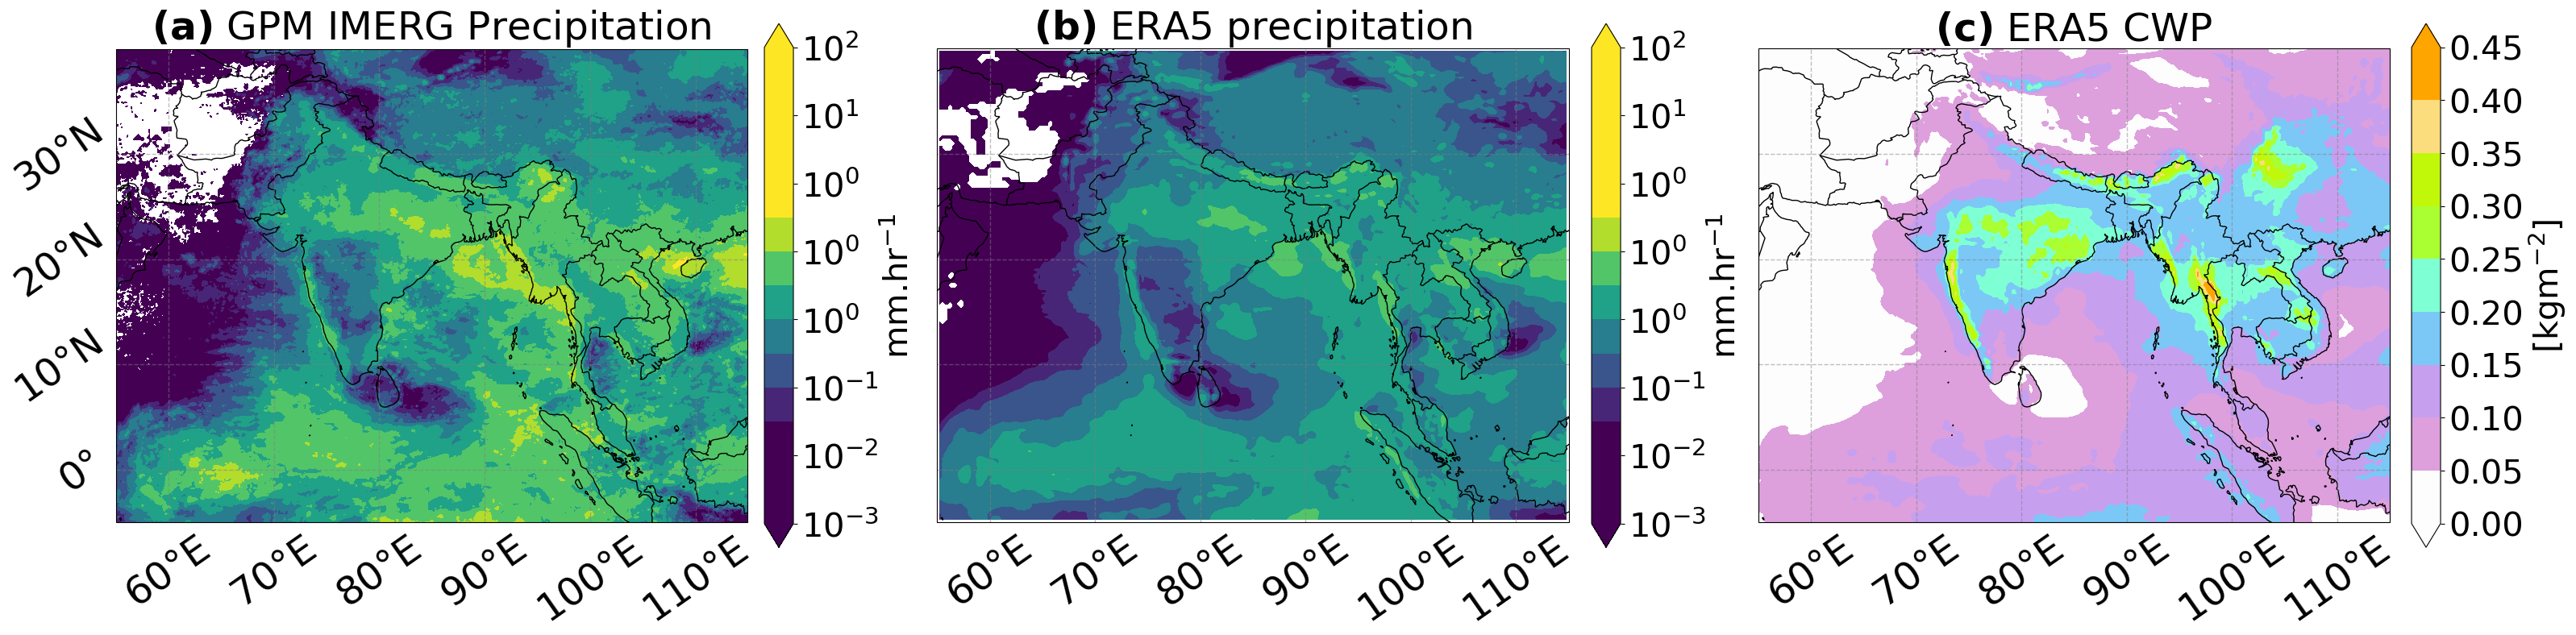

In [2]:
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/evaluation/'
#
IMERGE = basedir + 'IMERG_pr_Asia_timeavg_transposed.nc'
IMERGE = xr.open_dataset( IMERGE,decode_times=False)
IMERGE_vals_pr = IMERGE['precipitationCal']
lons_IMERGE = IMERGE.lon
lats_IMERGE = IMERGE.lat
#
ERA5_cwp = basedir + 'ERA5_CWP_Asia_timeavg.nc'
ERA5_cwp = xr.open_dataset( ERA5_cwp)
ERA5_vals_cwp = ERA5_cwp['tciw']
lons_ERA5_cwp = ERA5_cwp.longitude
lats_ERA5_cwp = ERA5_cwp.latitude
#
ERA5_pr = basedir + 'pr_1hr_reanalysis_era5_r1i1p1_20160809-20160909_Asia_mm_hr_timmean_regridded.nc'
ERA5_pr = xr.open_dataset( ERA5_pr)
ERA5_vals_pr = ERA5_pr['pr']
lons_ERA5_pr = ERA5_pr.longitude
lats_ERA5_pr = ERA5_pr.latitude

def resize_colorbar(event):
    plt.draw()

    posn = ax.get_position()
    cbar_ax.set_position([posn.x0 + posn.width + 0.01, posn.y0,
                          0.04, posn.height])
levs_pr = np.arange(0,2,0.05)
levs_cwp = np.arange(0,0.5,0.05)

levs_pr = np.logspace(-3, 2, 15)
class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
                self.midpoint = midpoint
                colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
                x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
                return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
def scientific_notation_no_e(x, pos):
    exponent = int(np.log10(x))
    return r"$10^{{{}}}$".format(exponent)

# Create a FuncFormatter with the custom function
scientific_formatter = FuncFormatter(scientific_notation_no_e)

# Colorbar with NSW Precip colors
nws_precip_colors = [
    "#fdfdfd",  # 0.01 - 0.10 inches
    "#E6E6FA",
    "#DDA0DD",  # 0.10 - 0.25 inches
    "#C79FEF",  # 0.25 - 0.50 inches
    "#7BC8F6",  # 0.50 - 0.75 inches
    "#0343DF",  # 0.75 - 1.00 inches
    "#7FFFD4",  # 1.00 - 1.50 inches
    "#AAFF32",  # 1.50 - 2.00 inches
    "#C1F80A",  # 2.00 - 2.50 inches
    "#F97306",  # 2.50 - 3.00 inches
    "#FBDD7E",  # 3.00 - 4.00 inches
    "#FFA500",  # 4.00 - 5.00 inches
]
precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(left=0.01, right=0.95, bottom=0.05, top=0.8, wspace=0.3, hspace=0.1)

# Plot 1: GPM IMERG Precipitation
im1 = axes[0].contourf(lons_IMERGE, lats_IMERGE, IMERGE_vals_pr[0], levels=levs_pr, cmap='viridis', norm=LogNorm(vmin=0.01, vmax=2), extend='both')
axes[0].set_title(r'$\bf{(a)}$ GPM IMERG Precipitation', size=35)
axes[0].coastlines()
axes[0].add_feature(cf.BORDERS)
gl = axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.xlabel_style = {'size': 35, 'rotation': 35}
gl.ylabel_style = {'size': 35, 'rotation': 35}


# Colorbar for Plot 1
cbar_ax1 = fig.add_axes([0.278, 0.1, 0.012, 0.65])  # Adjusted for 1x3 layout
cbar1 = plt.colorbar(im1, cax=cbar_ax1, shrink=0.8, aspect=20, format=scientific_formatter)
cbar1.set_label("mm.hr$^{-1}$", size=30)
cbar1.ax.tick_params(labelsize=30)
#
#########
# Plot 3: Additional Plot (Example)
# Replace this with your third dataset
im2 = axes[1].contourf(lons_ERA5_pr, lats_ERA5_pr, ERA5_vals_pr[0] * 0.5, levels=levs_pr, cmap='viridis', norm=LogNorm(vmin=0.01, vmax=2), extend='both')  # Example data
axes[1].set_title(r'$\bf{(b)}$ ERA5 precipitation', size=35)
axes[1].coastlines()
axes[1].add_feature(cf.BORDERS)
gl = axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.xlabel_style = {'size': 35, 'rotation': 35}
gl.ylabel_style = {'size': 35, 'rotation': 35}

# Colorbar for Plot 3
cbar_ax2 = fig.add_axes([0.62, 0.1, 0.012, 0.65])
cbar2 = plt.colorbar(im2, cax=cbar_ax2, shrink=0.8, aspect=20, format=scientific_formatter)
cbar2.set_label("mm.hr$^{-1}$", size=30)
cbar2.ax.tick_params(labelsize=30)

# Plot 2: ERA5 Cloud Water Path (CWP)
im3 = axes[2].contourf(lons_ERA5_cwp, lats_ERA5_cwp, ERA5_vals_cwp[0], levels=levs_cwp, cmap=precip_colormap, extend='both')
axes[2].set_title(r'$\bf{(c)}$ ERA5 CWP', size=35)
axes[2].coastlines()
axes[2].add_feature(cf.BORDERS)
gl = axes[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.xlabel_style = {'size': 35, 'rotation': 35}
gl.ylabel_style = {'size': 35, 'rotation': 35}
# Colorbar for Plot 2
cbar_ax3 = fig.add_axes([0.959, 0.1, 0.012, 0.65])
cbar3 = plt.colorbar(im3, cax=cbar_ax3, shrink=0.8, aspect=20)
cbar3.set_label(r'[kgm$^{-2}$]', size=30)
cbar3.ax.tick_params(labelsize=30)



# Save the figure if needed
#plt.savefig('/home/u32/temakgoale/IMERGE_ERA5_CWP_1x3.png', dpi=200, bbox_inches='tight')
#plt.savefig('/home/u32/temakgoale/IMERGE_ERA5_CWP_1x3.pdf', format='pdf', dpi=200, bbox_inches='tight')

#plt.show()
